In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast




In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/talis-fb/movies_study/refs/heads/main/bases/definitive_dataset.csv')

In [ ]:
df['genres'] = df['genres'].apply(json.loads)
df['production_companies'] = df['production_companies'].apply(json.loads)

In [ ]:
df = df[(df['budget'] > 0 ) & (df['revenue'] > 0) & (df['imdb'].notnull()) & (df['rotten'].notnull())]





In [ ]:
df.shape

(1805, 16)

In [ ]:
df[df['budget'] == 0].sort_values('popularity', ascending=False)

,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten
2363,2369,tt29585672,Tuhog,2023,NaN,NaN,0,"[Romance, Drama]",tl,565.7340,[Vivamax],0,92,NaN,41.0,NaN
608,609,tt33319706,Saint Catherine,2024,NaN,NaN,0,[Horror],en,206.1029,[Black Mandala],0,86,NaN,NaN,NaN
838,841,tt16916320,The Siege,2023,NaN,NaN,0,"[Action, Thriller, Drama]",en,146.2250,[MSR Media SKN],0,97,NaN,35.0,NaN
943,947,tt24515124,Winter Spring Summer or Fall,2024,NaN,NaN,0,"[Comedy, Romance, Drama]",en,95.9147,"[Motion Picture Corporation of America, Brad K...",0,97,NaN,67.0,36.0
2376,2382,tt23785128,Founders Day,2023,NaN,NaN,0,"[Thriller, Horror, Comedy, Mystery]",en,79.7620,"[Mainframe Pictures, Dark Sky Films]",0,107,39.0,44.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,8389,tt6645792,The Thorn,2023,"$577,004",NaN,0,"[Adventure, History, Drama]",en,0.0143,[],0,92,NaN,76.0,NaN
148,148,tt13049516,Rose Blood: A Friday the 13th Fan Film,2021,NaN,NaN,0,[Horror],ru,0.0071,[],0,0,NaN,57.0,NaN
8898,8923,tt7594306,Do Unto Others,2016,NaN,NaN,0,[Horror],en,0.0000,[Bill Zebub Productions],0,75,NaN,NaN,NaN
6964,6986,tt4876742,Unit 731,2015,NaN,NaN,0,[Documentary],en,0.0000,[],0,0,NaN,50.0,NaN


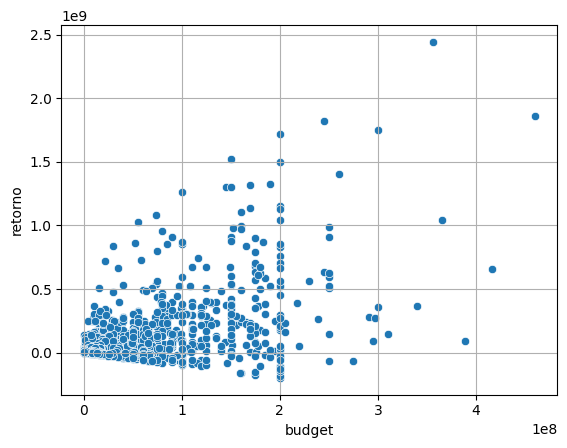

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)


kdf = genre_dummies




df['cluster'] = KMeans(n_clusters=7, random_state=0, n_init='auto').fit_predict(kdf)

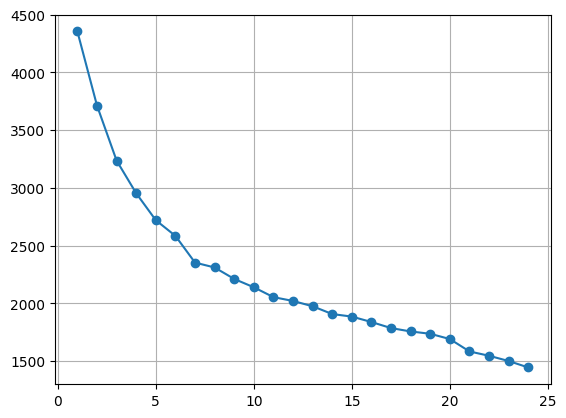

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

kdf = genre_dummies

ks = range(1, 25)

inertias = []

for k in ks:
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  km.fit(kdf)

  inertias.append(km.inertia_)

plt.grid(True)
plt.plot(ks, inertias, marker='o')


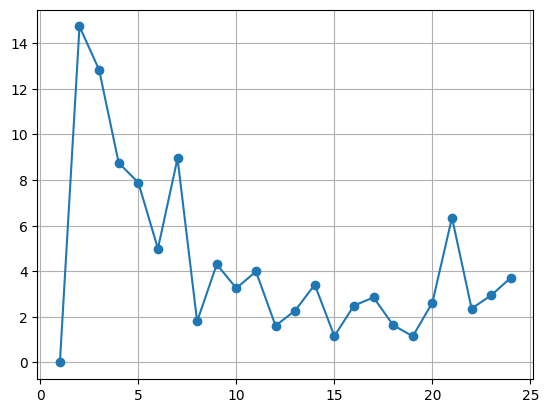

In [ ]:

diff = [(1 - (inertias[i] / inertias[i-1]))*100 if i > 0 else 0 for i in range(0,len(inertias))]
plt.grid(True)
plt.plot(range(1,len(diff)+1), diff, marker='o')

In [ ]:
kdf.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Science Fiction,Sport,Thriller,War,Western
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
25,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
df.groupby('cluster')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1241.0,1.046465e+07,5.069064e+07,0.0,0.0,0.0,4.138440e+05,7.517366e+08
1,1388.0,9.660401e+06,4.204012e+07,0.0,0.0,0.0,4.438125e+04,7.030000e+08
2,1852.0,9.148389e+06,3.979290e+07,0.0,0.0,0.0,1.282922e+05,6.341517e+08
3,2016.0,6.076486e+06,4.853160e+07,0.0,0.0,0.0,6.847875e+04,1.488733e+09
4,552.0,7.645098e+07,2.596645e+08,0.0,0.0,0.0,2.266624e+06,2.799439e+09
5,1100.0,2.637145e+07,1.056642e+08,0.0,0.0,0.0,3.772259e+06,1.515400e+09
6,818.0,1.757936e+07,7.174734e+07,0.0,0.0,0.0,6.362047e+06,9.520000e+08
7,695.0,1.374978e+08,2.889080e+08,0.0,0.0,9765483.0,1.296556e+08,2.320250e+09


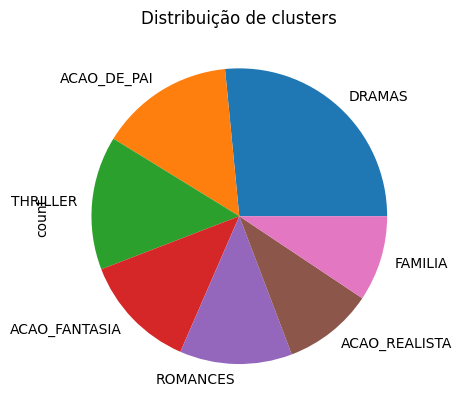

In [ ]:
df['cluster'].value_counts().plot(kind='pie')
plt.title("Distribuição de clusters")
plt.show()

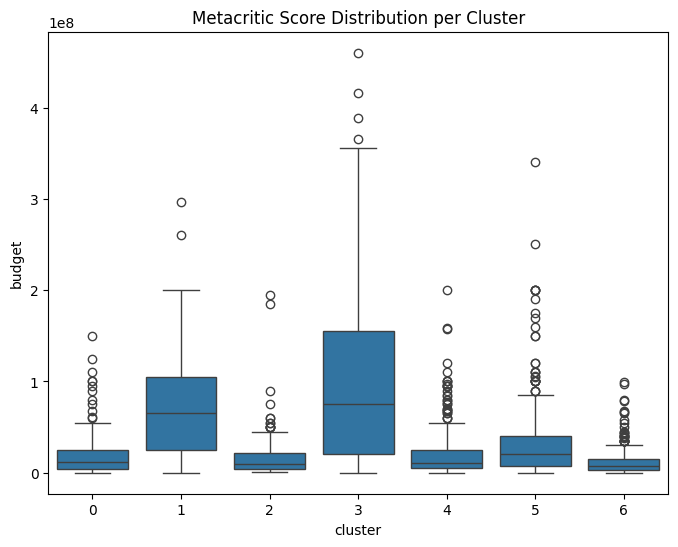

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='budget', data=df)
plt.title("Metacritic Score Distribution per Cluster")
plt.show()

/tmp/ipython-input-51-3762133597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['deu_lucro'] = t_df['revenue'] > t_df['budget']
/tmp/ipython-input-51-3762133597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['deu_lucro'] = t_df['revenue'] > t_df['budget']
/tmp/ipython-input-51-3762133597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

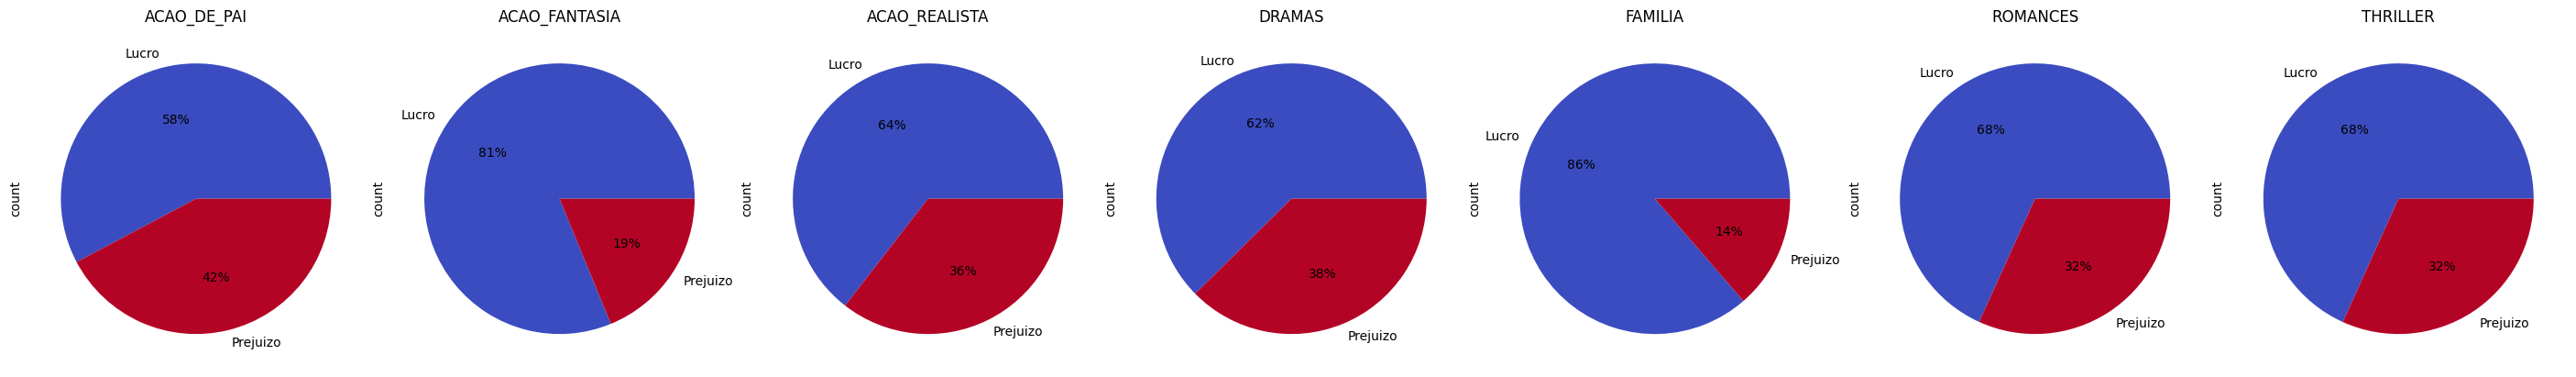

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
clusters = sorted(df['cluster'].unique())
n = len(clusters)

fig, axes = plt.subplots(1, n, figsize=(4 * n, 4), constrained_layout=True)

for i, cluster_id in enumerate(clusters):
  t_df = df[(df['cluster'] == cluster_id) & (df['revenue'] > 0) & (df['budget'] > 0) & (df['Year'] < 2020)]
  t_df['deu_lucro'] = t_df['revenue'] > t_df['budget']

  plt.figure(figsize=(8, 6))
  ax = axes[i]

  t_df['deu_lucro'].map({True: 'Lucro', False: 'Prejuizo'}).value_counts().plot(kind='pie', ax=ax, colormap='coolwarm', autopct='%1.0f%%')
  
  ax.set_title(f"{cluster_id}")

plt.suptitle(f'Lucro por genre')

plt.show()


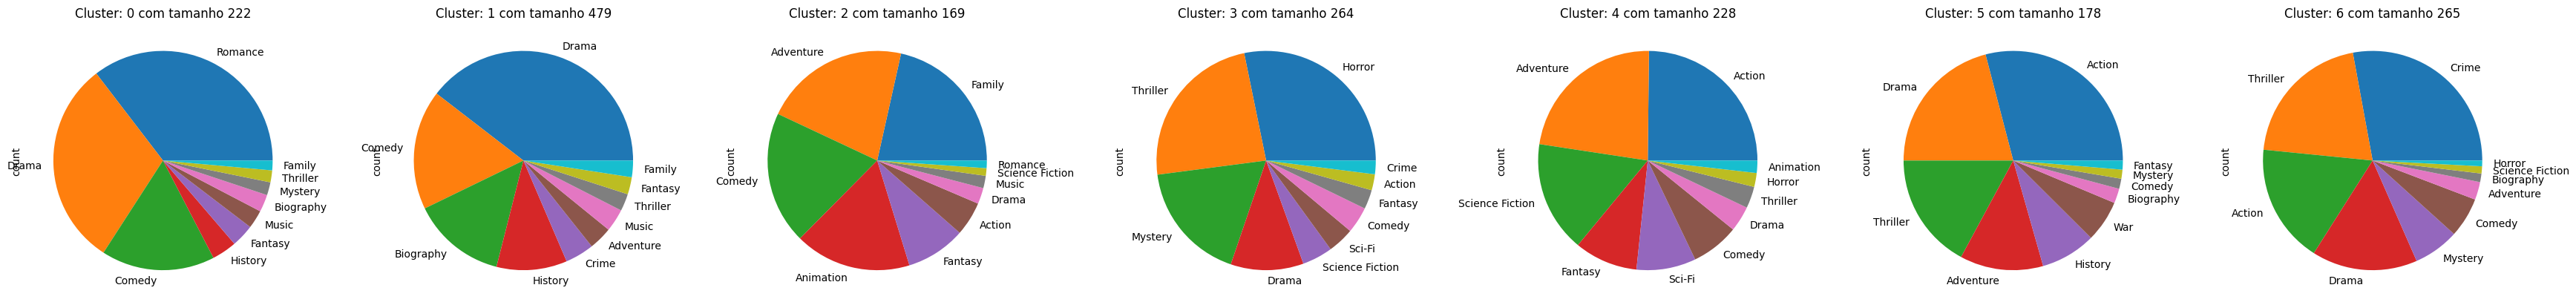

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:









clusters = sorted(df['cluster'].unique())
n = len(clusters)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

for i, cluster_id in enumerate(clusters):
  filtered = df[df['cluster'] == cluster_id]

  tamanho = filtered.shape[0]

  filtered = filtered.explode('genres')

  plt.figure(figsize=(8, 6))
  ax = axes[i]
  filtered['genres'].value_counts()[:10].plot(kind='pie', ax=ax)
  ax.set_title(f"Cluster: {cluster_id} com tamanho {tamanho}")
  

plt.suptitle(f'Correlation by genre')
plt.show()


In [ ]:
df[df['cluster'] == 2].sort_values('popularity', ascending=False).head(40)[['Year','Title']]

,Year,Title
927,2024,Mufasa: The Lion King
940,2024,Moana 2
1043,2024,Despicable Me 4
945,2024,Flow
937,2024,The Wild Robot
1069,2024,Inside Out 2
998,2023,The Super Mario Bros. Movie
5071,2024,Panda Plan
1209,2022,Sonic the Hedgehog 2
1385,2024,The Garfield Movie


In [ ]:
novo_df = df
novo_df['cluster'] = df['cluster'].map({
    0: 'ROMANCES',
    1: 'DRAMAS',
    2: 'FAMILIA',
    3: 'THRILLER',
    4: 'ACAO_FANTASIA',
    5: 'ACAO_REALISTA',
    6: 'ACAO_DE_PAI',
})

novo_df.head()

,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten,cluster
11,11,tt14827150,The Last Breath,2024,"$3,214",NaN,30000,"[Thriller, Horror]",en,4.5953,"[Anamorphic Films, Filmgate Films, Picaro Film...",273650,96,NaN,47.0,30.0,THRILLER
13,13,tt20315818,Ezra,2023,"$2,631,460",NaN,5000000,"[Comedy, Drama]",en,6.5663,"[Closer Media, Wayfarer Studios]",3046741,100,NaN,65.0,70.0,DRAMAS
18,18,tt11908172,The Kill Room,2023,"$139,358",NaN,50000000,"[Thriller, Comedy, Crime]",en,6.5394,"[Yale Productions, Idiot Savant Pictures, Unti...",476375,98,58.0,55.0,59.0,ACAO_DE_PAI
20,20,tt11687104,"Alice, Darling",2022,"$101,000",NaN,4000000,"[Thriller, Romance, Mystery, Drama]",en,4.2332,"[Babe Nation Films, Elevation Pictures, Lionsg...",121067,90,65.0,56.0,84.0,ROMANCES
25,25,tt1798632,Firestarter,2022,"$9,739,250",NaN,12000000,"[Horror, Science Fiction, Sci-Fi, Drama]",en,6.9572,"[Blumhouse Productions, Weed Road Pictures, Bo...",15000000,94,32.0,46.0,10.0,THRILLER


In [ ]:
df.head()

,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten,cluster
11,11,tt14827150,The Last Breath,2024,"$3,214",NaN,30000,"[Thriller, Horror]",en,4.5953,"[Anamorphic Films, Filmgate Films, Picaro Film...",273650,96,NaN,47.0,30.0,THRILLER
13,13,tt20315818,Ezra,2023,"$2,631,460",NaN,5000000,"[Comedy, Drama]",en,6.5663,"[Closer Media, Wayfarer Studios]",3046741,100,NaN,65.0,70.0,DRAMAS
18,18,tt11908172,The Kill Room,2023,"$139,358",NaN,50000000,"[Thriller, Comedy, Crime]",en,6.5394,"[Yale Productions, Idiot Savant Pictures, Unti...",476375,98,58.0,55.0,59.0,ACAO_DE_PAI
20,20,tt11687104,"Alice, Darling",2022,"$101,000",NaN,4000000,"[Thriller, Romance, Mystery, Drama]",en,4.2332,"[Babe Nation Films, Elevation Pictures, Lionsg...",121067,90,65.0,56.0,84.0,ROMANCES
25,25,tt1798632,Firestarter,2022,"$9,739,250",NaN,12000000,"[Horror, Science Fiction, Sci-Fi, Drama]",en,6.9572,"[Blumhouse Productions, Weed Road Pictures, Bo...",15000000,94,32.0,46.0,10.0,THRILLER


In [ ]:
df.to_csv('./dataset_com_cluster.csv')